## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

## Load Data

In [2]:
data = pd.read_csv('EUR_USD.csv', skiprows=6)

data.columns = ['Date', 'Close', 'OBS Status']
data = data.drop('OBS Status', axis=1)
data['Date'] = pd.to_datetime(data['Date'])
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

## Visualize Close Price

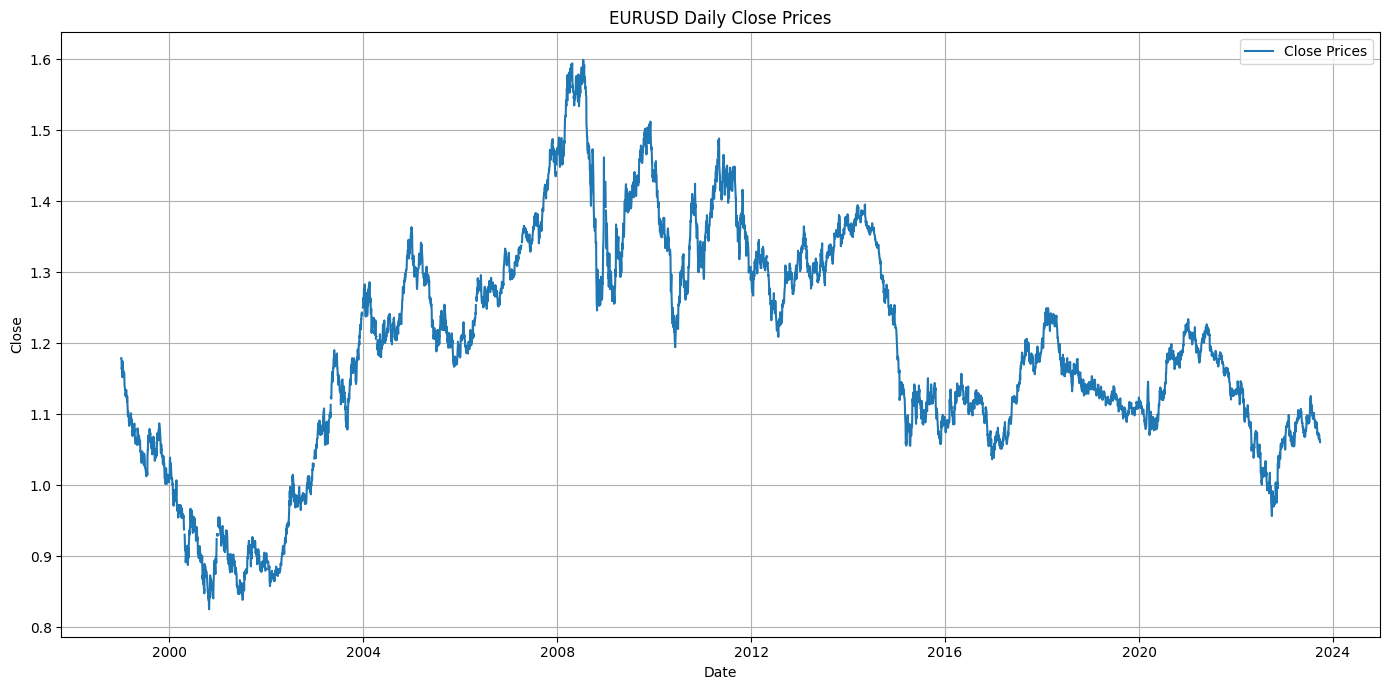

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Prices')
plt.title('EURUSD Daily Close Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ADF Test

In [4]:
data_cleaned = data.dropna()

result = adfuller(data_cleaned['Close'], regression='c', maxlag=1, autolag=None)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of Lags:', result[2])
print('Number of Observations:', result[3])
print('Critical Values:', result[4])

ADF Statistic: -1.8849969164247578
p-value: 0.339151615179094
Number of Lags: 1
Number of Observations: 6334
Critical Values: {'1%': -3.431382831089674, '5%': -2.861996420816857, '10%': -2.567012949712604}


ADF Test Statistic < Critical Value for 1%, 5%, 10%   ->    EUR/USD Conversion is not stationary 